In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

# Basic inspection
df.head(), df.tail(), df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   str    
 1   Price   9011 non-null   float64
dtypes: float64(1), str(1)
memory usage: 140.9 KB


(        Date  Price
 0  20-May-87  18.63
 1  21-May-87  18.45
 2  22-May-87  18.55
 3  25-May-87  18.60
 4  26-May-87  18.63,
               Date  Price
 9006  Nov 08, 2022  96.85
 9007  Nov 09, 2022  93.05
 9008  Nov 10, 2022  94.25
 9009  Nov 11, 2022  96.37
 9010  Nov 14, 2022  93.59,
 None)

In [3]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Sort by date (VERY IMPORTANT)
df = df.sort_values("Date").reset_index(drop=True)

df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_14776\3061801099.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


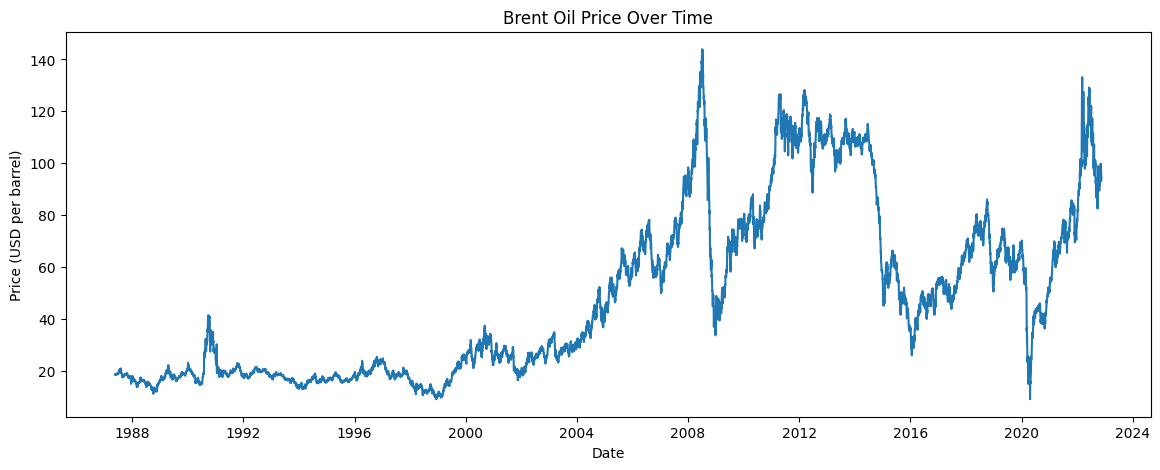

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()

In [5]:
import numpy as np

df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()

df[["Date", "log_return"]].head()


,Date,log_return
0,1987-05-20,NaN
1,1987-05-21,-0.009709
2,1987-05-22,0.005405
3,1987-05-25,0.002692
4,1987-05-26,0.001612


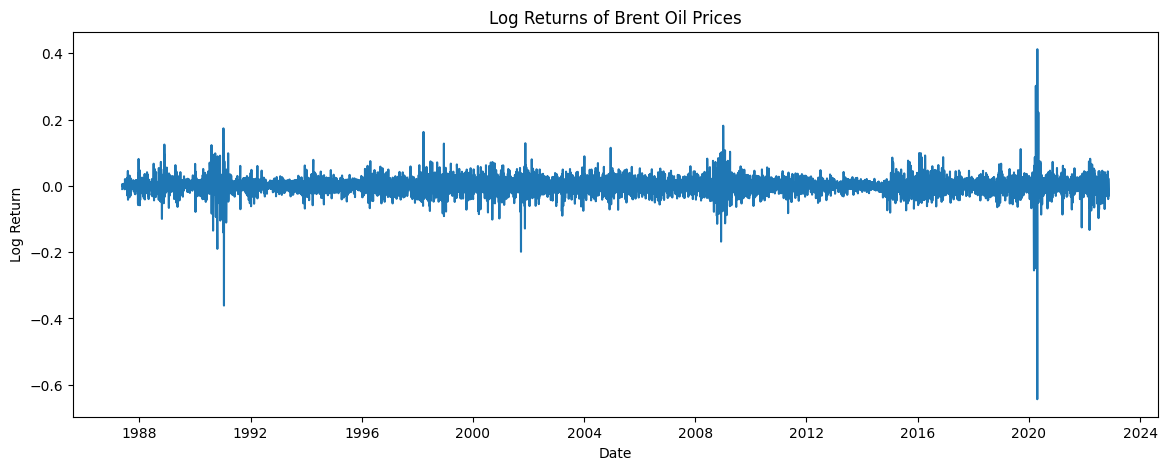

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()
